In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import cv2
import sys
sys.path.append("../")

from utils.dataset import FreiHAND
from utils.model import ShallowUNet
from utils.trainer import Trainer
from utils.prep_utils import (
    blur_heatmaps,
    IoULoss,
    COLORMAP,
    config,
    N_KEYPOINTS,
    N_IMG_CHANNELS,
    get_norm_params,
    show_data,
    projectPoints
)

### Train Parameters

In [3]:
config = {
    "data_dir": "data/FreiHAND_pub_v2",
    "epochs": 250,
    "batch_size": 48,
    "batches_per_epoch": 50,
    "batches_per_epoch_val": 20,
    "learning_rate": 0.1,
    "device": torch.device("cuda" if torch.cuda.is_available() else "cpu"),
}

In [9]:
#get_norm_params(train_dataloader)

## Data

In [10]:
train_dataset = FreiHAND(config=config, set_type="train")
train_dataloader = DataLoader(
    train_dataset, config["batch_size"], shuffle=True, drop_last=True, num_workers=2
)

val_dataset = FreiHAND(config=config, set_type="val")
val_dataloader = DataLoader(
    val_dataset, config["batch_size"], shuffle=True, drop_last=True, num_workers=2
)

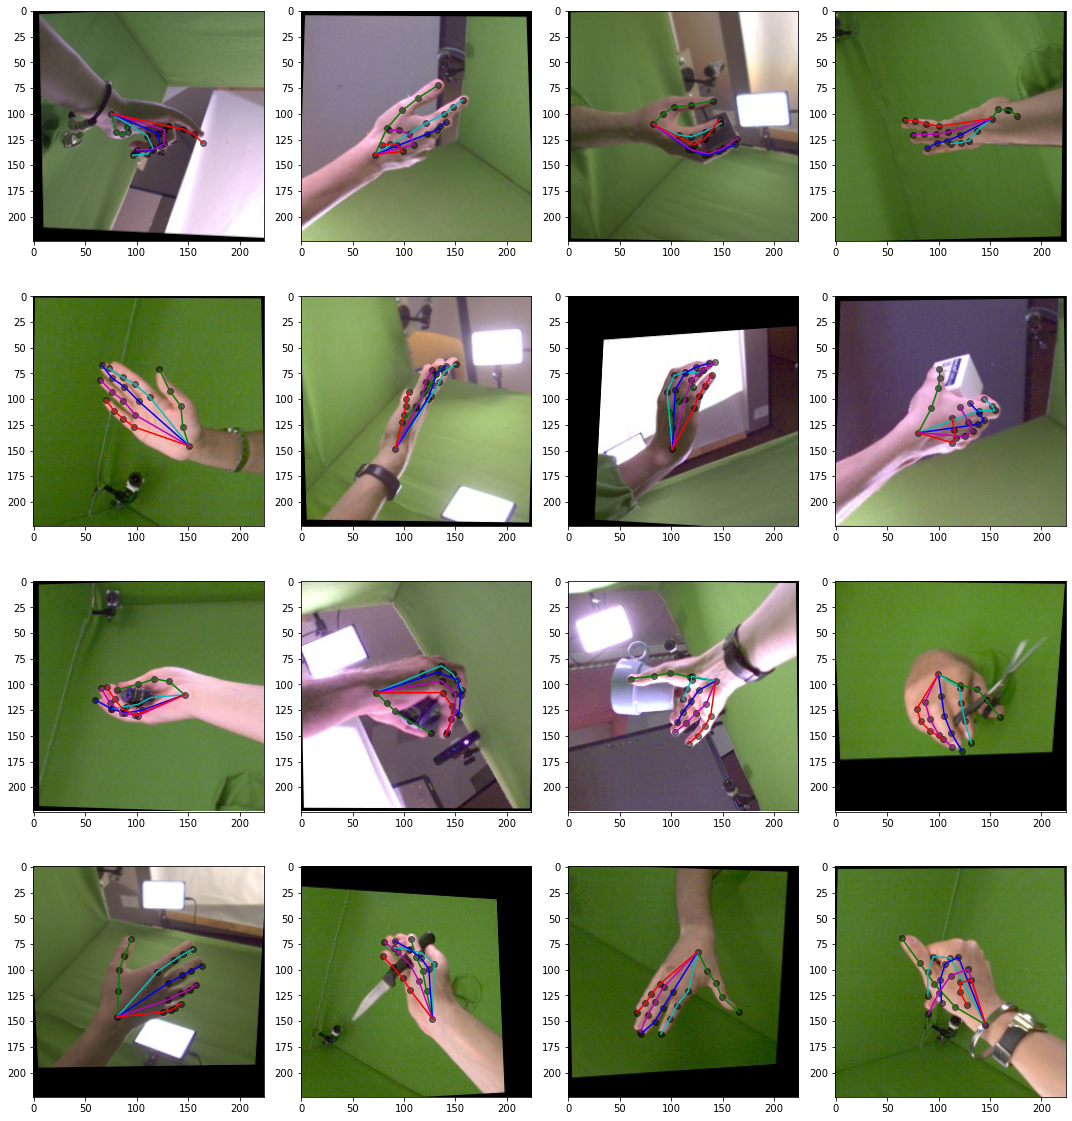

In [11]:
# visualize random batch of data train samples + labels
show_data(train_dataset, n_samples=16)

## Model

In [12]:
model = ShallowUNet(N_IMG_CHANNELS, N_KEYPOINTS)
model = model.to(config["device"])

criterion = IoULoss()
optimizer = optim.SGD(model.parameters(), lr=config["learning_rate"])
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=optimizer, factor=0.5, patience=20, verbose=True, threshold=0.00001
)

## Training till epoch=146

In [27]:
trainer = Trainer(model, criterion, optimizer, config, scheduler)
model = trainer.train(train_dataloader, val_dataloader)

Epoch: 1/1000, Train Loss=0.9926404357, Val Loss=0.9926618962
Val loss decreased (10000.000000 --> 0.992662).  Saving model at Epoch: 1
Epoch: 2/1000, Train Loss=0.9924976826, Val Loss=0.9924452333
Val loss decreased (0.992662 --> 0.992445).  Saving model at Epoch: 2
Epoch: 3/1000, Train Loss=0.9923110008, Val Loss=0.9922641431
Val loss decreased (0.992445 --> 0.992264).  Saving model at Epoch: 3
Epoch: 4/1000, Train Loss=0.9921135902, Val Loss=0.992054224
Val loss decreased (0.992264 --> 0.992054).  Saving model at Epoch: 4
Epoch: 5/1000, Train Loss=0.9918234348, Val Loss=0.9917951766
Val loss decreased (0.992054 --> 0.991795).  Saving model at Epoch: 5
Epoch: 6/1000, Train Loss=0.9915471673, Val Loss=0.9914024472
Val loss decreased (0.991795 --> 0.991402).  Saving model at Epoch: 6
Epoch: 7/1000, Train Loss=0.9911371469, Val Loss=0.9910003316
Val loss decreased (0.991402 --> 0.991000).  Saving model at Epoch: 7
Epoch: 8/1000, Train Loss=0.9904613495, Val Loss=0.9902867107
Val loss de

Epoch: 84/1000, Train Loss=0.569991827, Val Loss=0.5521968035
Epoch: 85/1000, Train Loss=0.5234212875, Val Loss=0.5382137355
Epoch: 86/1000, Train Loss=0.5002757907, Val Loss=0.5431456765
Epoch: 87/1000, Train Loss=0.5516833067, Val Loss=0.5297681491
Val loss decreased (0.536378 --> 0.529768).  Saving model at Epoch: 87
Epoch: 88/1000, Train Loss=0.5383456945, Val Loss=0.5307762765
Epoch: 89/1000, Train Loss=0.486790359, Val Loss=0.5415550612
Epoch: 90/1000, Train Loss=0.5005930066, Val Loss=0.5310968473
Epoch    90: reducing learning rate of group 0 to 5.0000e-02.
Epoch: 91/1000, Train Loss=0.4642336965, Val Loss=0.5065857882
Val loss decreased (0.529768 --> 0.506586).  Saving model at Epoch: 91
Epoch: 92/1000, Train Loss=0.4870675206, Val Loss=0.4952605565
Val loss decreased (0.506586 --> 0.495261).  Saving model at Epoch: 92
Epoch: 93/1000, Train Loss=0.4867358208, Val Loss=0.4987068801
Epoch: 94/1000, Train Loss=0.4687076807, Val Loss=0.5026907779
Epoch: 95/1000, Train Loss=0.49801

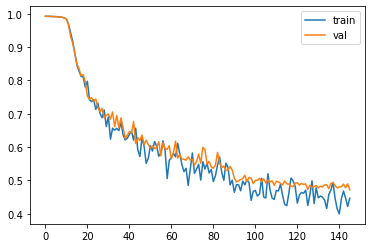

In [28]:
plt.plot(trainer.loss["train"], label="train")
plt.plot(trainer.loss["val"], label="val")
plt.legend()
plt.show()

In [ ]:
lossval146=trainer.loss["val"]
losstrain146=trainer.loss["train"]

## Training till epoch=250

In [13]:
trainer = Trainer(model, criterion, optimizer, config, scheduler)
model = trainer.train(train_dataloader, val_dataloader)

Epoch: 1/250, Train Loss=0.9930979013, Val Loss=0.9930371983
Val loss decreased (10000.000000 --> 0.993037).  Saving model at Epoch: 1
Epoch: 2/250, Train Loss=0.9930198193, Val Loss=0.9930095786
Val loss decreased (0.993037 --> 0.993010).  Saving model at Epoch: 2
Epoch: 3/250, Train Loss=0.9928839207, Val Loss=0.9929224366
Val loss decreased (0.993010 --> 0.992922).  Saving model at Epoch: 3
Epoch: 4/250, Train Loss=0.992803514, Val Loss=0.9928053703
Val loss decreased (0.992922 --> 0.992805).  Saving model at Epoch: 4
Epoch: 5/250, Train Loss=0.992708981, Val Loss=0.9926627392
Val loss decreased (0.992805 --> 0.992663).  Saving model at Epoch: 5
Epoch: 6/250, Train Loss=0.9925210476, Val Loss=0.9924943731
Val loss decreased (0.992663 --> 0.992494).  Saving model at Epoch: 6
Epoch: 7/250, Train Loss=0.9923190475, Val Loss=0.9923109157
Val loss decreased (0.992494 --> 0.992311).  Saving model at Epoch: 7
Epoch: 8/250, Train Loss=0.9920933247, Val Loss=0.9920727412
Val loss decreased (

Epoch: 79/250, Train Loss=0.5416864157, Val Loss=0.589954626
Epoch: 80/250, Train Loss=0.5357840061, Val Loss=0.5576886989
Epoch: 81/250, Train Loss=0.5185925961, Val Loss=0.5649037049
Epoch: 82/250, Train Loss=0.5480821133, Val Loss=0.5459647661
Val loss decreased (0.554632 --> 0.545965).  Saving model at Epoch: 82
Epoch: 83/250, Train Loss=0.4947458506, Val Loss=0.5459717455
Epoch: 84/250, Train Loss=0.4809218049, Val Loss=0.5370695761
Val loss decreased (0.545965 --> 0.537070).  Saving model at Epoch: 84
Epoch: 85/250, Train Loss=0.5244841576, Val Loss=0.5430446437
Epoch: 86/250, Train Loss=0.5685232282, Val Loss=0.545621503
Epoch: 87/250, Train Loss=0.5466644764, Val Loss=0.5416751532
Epoch: 88/250, Train Loss=0.4573616982, Val Loss=0.5547686503
Epoch: 89/250, Train Loss=0.497394383, Val Loss=0.533648911
Val loss decreased (0.537070 --> 0.533649).  Saving model at Epoch: 89
Epoch: 90/250, Train Loss=0.6281914711, Val Loss=0.5347324241
Epoch: 91/250, Train Loss=0.5131100416, Val Los

Epoch: 187/250, Train Loss=0.3754556775, Val Loss=0.4508661571
Epoch: 188/250, Train Loss=0.4130783081, Val Loss=0.4474645881
Val loss decreased (0.448923 --> 0.447465).  Saving model at Epoch: 188
Epoch: 189/250, Train Loss=0.4044151902, Val Loss=0.452769095
Epoch: 190/250, Train Loss=0.4352108836, Val Loss=0.448151438
Epoch: 191/250, Train Loss=0.4143002629, Val Loss=0.4494121756
Epoch: 192/250, Train Loss=0.3985033035, Val Loss=0.4498321953
Epoch: 193/250, Train Loss=0.455344975, Val Loss=0.4554374956
Epoch: 194/250, Train Loss=0.4708943963, Val Loss=0.44894393
Epoch: 195/250, Train Loss=0.3949795365, Val Loss=0.4532183466
Epoch: 196/250, Train Loss=0.4239352345, Val Loss=0.4470316569
Val loss decreased (0.447465 --> 0.447032).  Saving model at Epoch: 196
Epoch: 197/250, Train Loss=0.4125664234, Val Loss=0.462724961
Epoch: 198/250, Train Loss=0.4271697402, Val Loss=0.4434871617
Val loss decreased (0.447032 --> 0.443487).  Saving model at Epoch: 198
Epoch: 199/250, Train Loss=0.43508

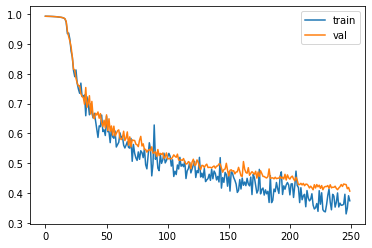

In [14]:
plt.plot(trainer.loss["train"], label="train")
plt.plot(trainer.loss["val"], label="val")
plt.legend()
plt.show()

In [15]:
lossval250=trainer.loss["val"]
losstrain250=trainer.loss["train"]